Что делать

Построить 5 графиков по выбранным данным.

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

In [30]:
trip_df = pd.read_csv('trips060120.txt', sep = r'\t')
trip_df.info()
trip_df.rename(columns={'tarif': 'tarif_id','card':'user_id'}, inplace=True)
trip_df.fillna('undefined',inplace=True)

C:\Users\Prozo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409226 entries, 0 to 409225
Data columns (total 5 columns):
date            409226 non-null object
tarif           409226 non-null int64
card            246306 non-null object
route           409226 non-null int64
organization    409226 non-null object
dtypes: int64(2), object(3)
memory usage: 15.6+ MB


In [31]:
def dater(datestr):
    
    result = datetime.strptime(datestr['date'], '%d.%m.%Y %H:%M:%S' )
    return result


trip_df['date']= trip_df.apply(dater, axis=1)

trip_df.head()

,date,tarif_id,user_id,route,organization
0,2020-02-06 00:00:07,96,42766843983234,29,АП2
1,2020-02-06 00:02:07,96,5368294230759D,29,АП1
2,2020-02-06 00:02:19,28,0674EE10000000000000,29,АП2
3,2020-02-06 00:02:51,96,5469681882007C,1,ТРАМВАЙНОЕ ДЕПО № 1
4,2020-02-06 00:03:06,0,undefined,1,ТРАМВАЙНОЕ ДЕПО № 1


In [32]:
main_pivot = trip_df.pivot_table(index='date', columns='organization', values='tarif_id',aggfunc='count',fill_value= 0).reset_index()
full_df = main_pivot.merge(trip_df, how = 'inner', on= 'date')
full_df

,date,АП1,АП2,ТРАМВАЙНОЕ ДЕПО № 1,ТРАМВАЙНОЕ ДЕПО № 2,ТРОЛЛЕЙБУСНЫЙ ПАРК № 1,ТРОЛЛЕЙБУСНЫЙ ПАРК № 2,tarif_id,user_id,route,organization
0,2020-02-06 00:00:07,0,1,0,0,0,0,96,42766843983234,29,АП2
1,2020-02-06 00:02:07,1,0,0,0,0,0,96,5368294230759D,29,АП1
2,2020-02-06 00:02:19,0,1,0,0,0,0,28,0674EE10000000000000,29,АП2
3,2020-02-06 00:02:51,0,0,1,0,0,0,96,5469681882007C,1,ТРАМВАЙНОЕ ДЕПО № 1
4,2020-02-06 00:03:06,0,0,1,0,0,0,0,undefined,1,ТРАМВАЙНОЕ ДЕПО № 1
...,...,...,...,...,...,...,...,...,...,...,...
409221,2020-02-06 23:57:54,0,0,1,0,0,0,0,undefined,1,ТРАМВАЙНОЕ ДЕПО № 1
409222,2020-02-06 23:58:13,0,0,0,0,1,0,96,42790157617FF1,7,ТРОЛЛЕЙБУСНЫЙ ПАРК № 1
409223,2020-02-06 23:59:06,0,0,1,0,0,0,0,undefined,1,ТРАМВАЙНОЕ ДЕПО № 1
409224,2020-02-06 23:59:53,0,0,0,0,0,1,96,4276689339C87C,10,ТРОЛЛЕЙБУСНЫЙ ПАРК № 2


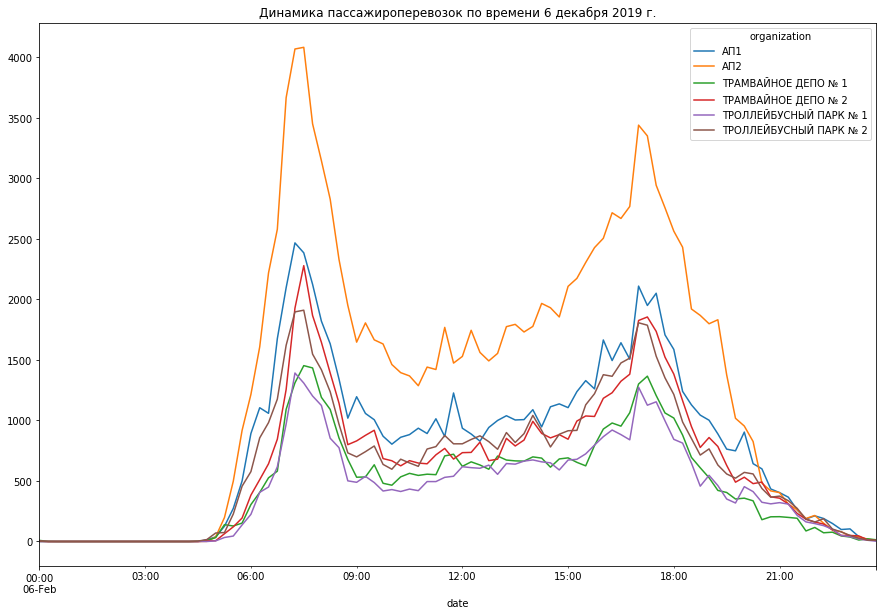

In [33]:
day_trips = main_pivot.groupby(pd.Grouper(key='date', freq='15min')).agg('sum')
day_trips.plot(title='Динамика пассажироперевозок по времени 6 декабря 2019 г.')

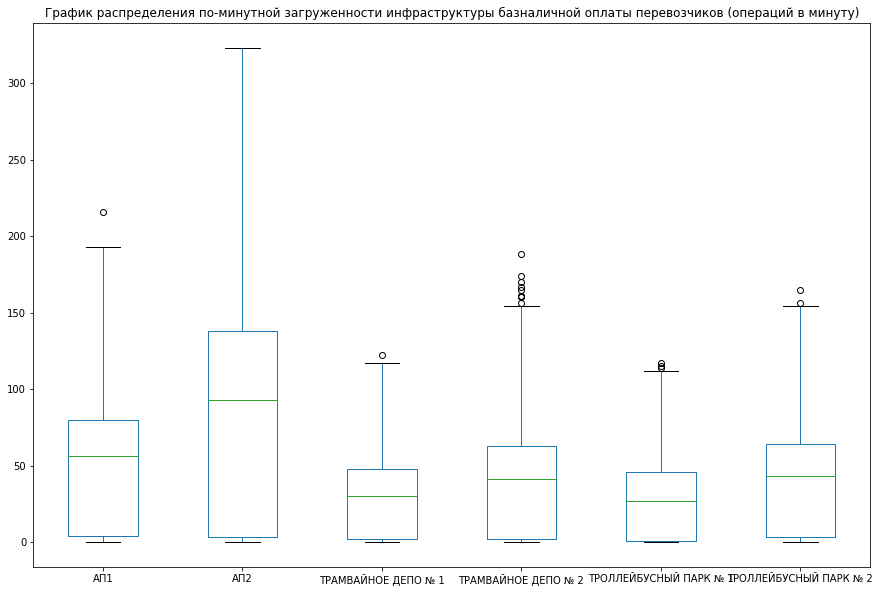

In [34]:
day_trips = main_pivot.groupby(pd.Grouper(key='date', freq='min')).agg('sum')
day_trips.plot(kind= 'box',title='График распределения по-минутной загруженности инфраструктуры базналичной оплаты перевозчиков (операций в минуту)')

,organization,date,tarif_id,user_id,route
0,АП2,125357,125357,125357,125357
1,АП1,76197,76197,76197,76197
2,ТРОЛЛЕЙБУСНЫЙ ПАРК № 2,61133,61133,61133,61133
3,ТРАМВАЙНОЕ ДЕПО № 2,60082,60082,60082,60082
4,ТРАМВАЙНОЕ ДЕПО № 1,44805,44805,44805,44805
5,ТРОЛЛЕЙБУСНЫЙ ПАРК № 1,41652,41652,41652,41652


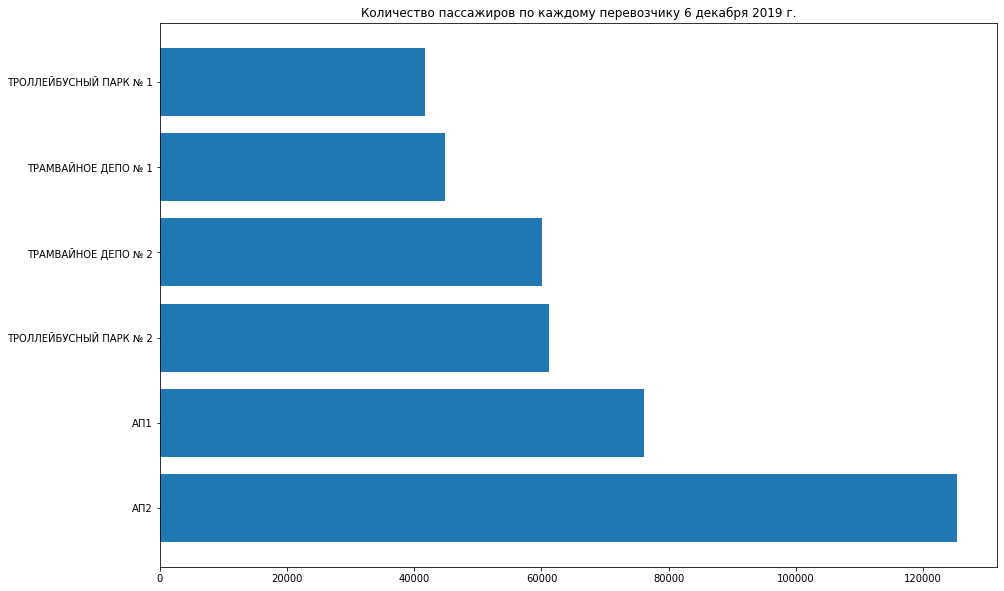

In [35]:
org_df = trip_df.groupby(['organization']).count().sort_values('route',ascending=False).reset_index()
plt.barh(org_df['organization'], org_df['route'])#Подписать
plt.title("Количество пассажиров по каждому перевозчику 6 декабря 2019 г.")

org_df

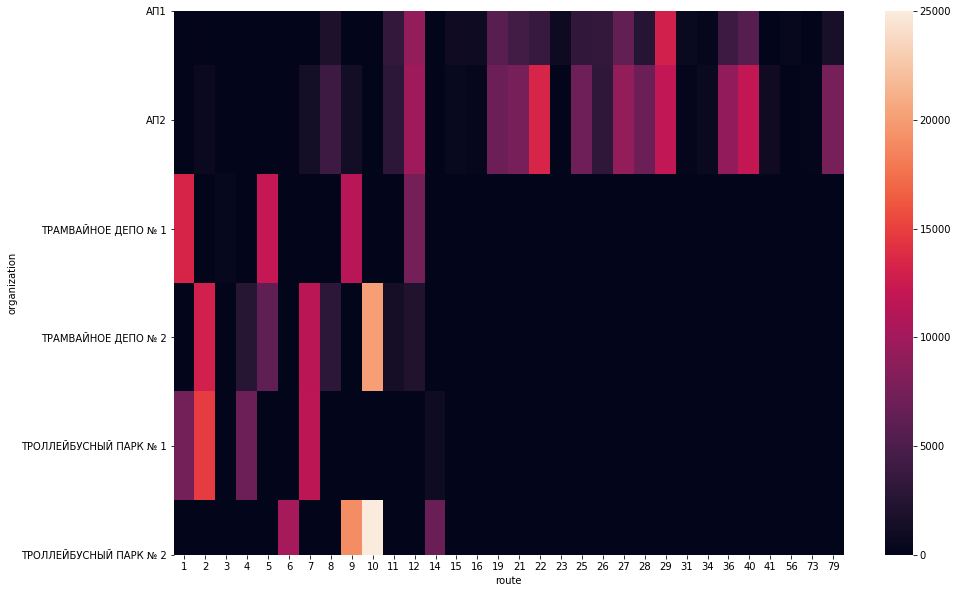

In [36]:
#Распределение дневных перевозок по маршрутам, отсеиваем городские (номер<80)
route_pivot = full_df.loc[full_df['route'] < 80].pivot_table(index='organization', columns='route', values='date',aggfunc='count',fill_value= 0)
route_pivot
sns.heatmap(route_pivot)
#Ввыводы:
#Данное распределение позволяет выявить интересный факт: 
#Несмотря на то что максимальное количество пассажиров перевозит предприятие АП2  и АП 1
#Самые загруженные с точки зрения пассажиропотока маршруты принадлежат: Троллейбусный парк 2 и Трамвайное депо 2 
# И в целом загруженость маршрутов электро-транспорта выше

In [146]:
#Зависимость вида тарифа от мршрута
#Долго пытался создать на scatter, но не получается, сделал тепловой картой
tarif_pivot= full_df.loc[full_df['route'] < 80].pivot_table(index='tarif_id', columns='route', values='date',aggfunc='count',fill_value= 0).reset_index()
tarif_pivot

route,tarif_id,1,2,3,4,5,6,7,8,9,...,28,29,31,34,36,40,41,56,73,79
0,0,8479,10591,205,3404,7120,3907,9300,3261,12916,...,3404,9331,379,455,5096,6650,378,153,84,3291
1,10,1008,1262,26,461,630,543,1060,433,1857,...,419,969,62,86,793,868,55,13,21,485
2,16,0,51,0,0,0,19,61,300,88,...,132,429,30,57,378,503,57,13,16,123
3,17,0,8,0,0,0,2,20,68,25,...,368,1088,7,8,345,463,22,6,2,304
4,18,0,7,0,0,0,1,9,118,47,...,286,483,16,22,157,661,11,9,9,172
5,19,485,713,14,224,588,238,478,133,605,...,0,0,0,0,0,0,0,0,0,0
6,20,54,127,2,45,29,66,55,5,139,...,0,0,0,0,0,0,0,0,0,0
7,21,0,5,0,2,2,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
8,22,50,61,3,6,136,2,65,38,70,...,10,61,1,3,41,31,13,0,0,24
9,23,74,102,0,27,0,54,92,49,140,...,34,90,4,9,57,44,15,6,7,33


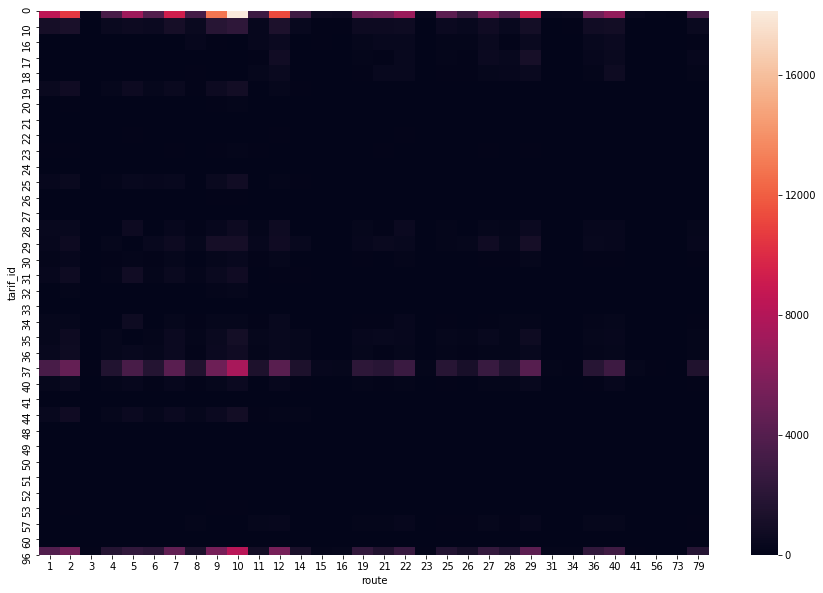

In [134]:
sns.heatmap(tarif_pivot)

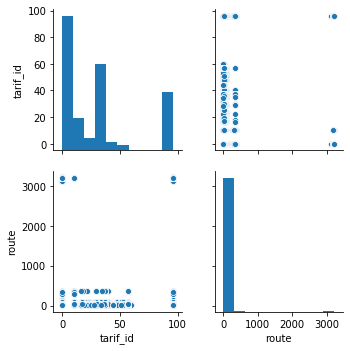

In [151]:
sns_plot = sns.pairplot(
    full_df[['tarif_id', 'organization', 'route' ]])
sns_plot

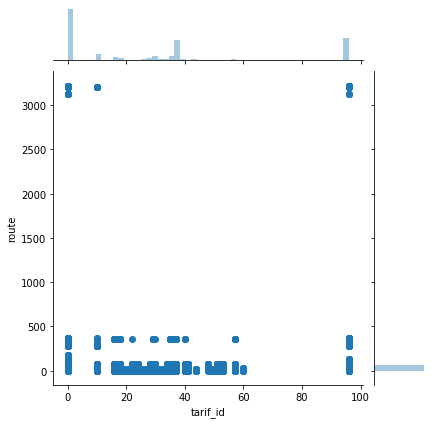

In [154]:
sns_plot = sns.jointplot(x='tarif_id', y='route', 
              data=full_df, kind='scatter')
sns_plot

In [49]:
import plotly.express as px

In [136]:
fig = px.scatter(tarif_pivot, x=index)
fig.show()

NameError: name 'index' is not defined

In [32]:
type(trip_df['date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
len(trip_df.card.unique())

110665